In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
import cv2
import matplotlib.image as mp

In [2]:

from google.colab import drive
drive.mount('/content/drive',force_remount=True)

Mounted at /content/drive


In [3]:
with open('/content/drive/My Drive/dev/teldev.txt') as file:
    mal_txt = file.read().split('\n')
with open('/content/drive/My Drive/dev/engdev.txt') as file:
    eng_txt = file.read().split('\n')
with open('/content/drive/My Drive/dev/devimages.txt') as file:
   dev_images = file.read().split('\n')


In [4]:
len(dev_images)

999

In [5]:
len(eng_txt)

999

In [6]:
len(mal_txt)

998

In [7]:
img_path=[]
for s in dev_images:
    img_path.append("/content/drive/My Drive/devimg/"+s+".jpg")

In [8]:
len(img_path)

999

/content/drive/My Drive/devimg/2396975.jpg
mal:విమానంలో ఆహారాన్ని లోడ్ చేస్తున్న కారు
eng:a car loading food on a plane	       


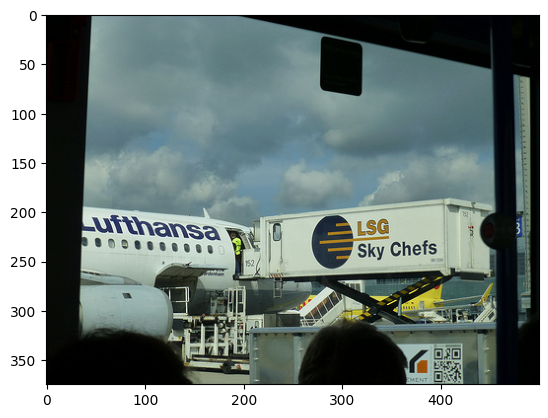

In [9]:
im=mp.imread(img_path[4])
plt.imshow(im)
print(img_path[4])
print("mal:"+mal_txt[4])
print("eng:"+eng_txt[4])

In [10]:
import pandas as pd
df = pd.read_csv ('/content/drive/My Drive/dev/devcrop.csv')
print(df)

       X    Y    W    H
0    324  197   44   22
1    215  242  243  130
2      0    0  410  497
3     19    2  166  209
4    216  185  237   82
..   ...  ...  ...  ...
993    1   51  450  227
994   44  202  138  207
995  174   88  325  201
996   47  135  190  273
997  157  318  341  142

[998 rows x 4 columns]


In [11]:
from keras.applications import ResNet50
from keras.models import Model
model_resnet = ResNet50(include_top=True, weights="imagenet")
model_resnet.layers.pop()
model_resnet = Model(inputs=model_resnet.inputs, outputs=model_resnet.layers[-2].output)
model_resnet.summary()


102967424/102967424 [==============================] - 0s 0us/step
Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 224, 224, 3)]        0         []                            
                                                                                                  
 conv1_pad (ZeroPadding2D)   (None, 230, 230, 3)          0         ['input_1[0][0]']             
                                                                                                  
 conv1_conv (Conv2D)         (None, 112, 112, 64)         9472      ['conv1_pad[0][0]']           
                                                                                                  
 conv1_bn (BatchNormalizati  (None, 112, 112, 64)         256       ['conv1_conv[0][0]']          
 on)                       

In [12]:
from keras.applications import InceptionV3
from keras.models import Model
from keras.preprocessing.image import load_img, img_to_array
from keras.applications.inception_v3 import preprocess_input
from collections import OrderedDict

# Load InceptionV3 model
model_inception = InceptionV3(include_top=True, weights='imagenet')
model_inception.layers.pop()
model_inception = Model(inputs=model_inception.inputs, outputs=model_inception.layers[-2].output)
model_inception.summary()

96112376/96112376 [==============================] - 0s 0us/step
Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_2 (InputLayer)        [(None, 299, 299, 3)]        0         []                            
                                                                                                  
 conv2d (Conv2D)             (None, 149, 149, 32)         864       ['input_2[0][0]']             
                                                                                                  
 batch_normalization (Batch  (None, 149, 149, 32)         96        ['conv2d[0][0]']              
 Normalization)                                                                                   
                                                                                                  
 activation (Activation)   

In [13]:
import cv2

In [14]:
dfnew=df

In [15]:
df

,X,Y,W,H
0,324,197,44,22
1,215,242,243,130
2,0,0,410,497
3,19,2,166,209
4,216,185,237,82
...,...,...,...,...
993,1,51,450,227
994,44,202,138,207
995,174,88,325,201
996,47,135,190,273


In [16]:
splits=len(df)
dfnew=df
imagedata=np.zeros(shape=(splits,224,224,3))
for i in range(splits):
    temp=mp.imread(img_path[i])
    X=dfnew['X'].values[i]
    Y=dfnew['Y'].values[i]
    W=dfnew['W'].values[i]
    H=dfnew['H'].values[i]
    temp = temp[Y:Y+H, X:X+W]
    if (len(temp.shape)==3):
      try:
         temp=cv2.resize(temp,(224,224))
         imagedata[i]=temp
      except:
        break
    elif (len(temp.shape)<3):
       #plt.imshow(temp)
       temp=cv2.cvtColor(temp, cv2.COLOR_BGR2RGB)
       temp=cv2.resize(temp,(224,224))
       imagedata[i]=temp
imagedata=imagedata/255
imagedata=imagedata.astype(np.float16)

In [17]:
imagedata[1]

array([[[0.4666 , 0.3254 , 0.2235 ],
        [0.4236 , 0.2783 , 0.1765 ],
        [0.408  , 0.2627 , 0.1608 ],
        ...,
        [0.89   , 0.6235 , 0.443  ],
        [0.859  , 0.5884 , 0.4236 ],
        [0.894  , 0.6235 , 0.4626 ]],

       [[0.4666 , 0.3254 , 0.2235 ],
        [0.4392 , 0.2942 , 0.1921 ],
        [0.4236 , 0.2783 , 0.1765 ],
        ...,
        [0.886  , 0.6157 , 0.4353 ],
        [0.863  , 0.5884 , 0.4158 ],
        [0.898  , 0.6274 , 0.4626 ]],

       [[0.4666 , 0.3176 , 0.2274 ],
        [0.4626 , 0.3176 , 0.2157 ],
        [0.451  , 0.306  , 0.204  ],
        ...,
        [0.886  , 0.608  , 0.4275 ],
        [0.8667 , 0.5884 , 0.4119 ],
        [0.902  , 0.6313 , 0.4548 ]],

       ...,

       [[0.1294 , 0.06665, 0.01569],
        [0.153  , 0.08234, 0.04315],
        [0.1647 , 0.0745 , 0.03137],
        ...,
        [0.953  , 0.718  , 0.5215 ],
        [0.937  , 0.7217 , 0.4902 ],
        [0.9453 , 0.753  , 0.5215 ]],

       [[0.1294 , 0.06665, 0.01569],
  

In [18]:
from keras.preprocessing.image import load_img, img_to_array
from keras.applications.resnet50 import preprocess_input as pre1
from keras.applications.inception_v3 import preprocess_input as pre2
from collections import OrderedDict

jpgs = img_path[:splits]
images_new = OrderedDict()
images_newv = OrderedDict()

npix_resnet = 224
npix_inception = 299
target_size_resnet = (npix_resnet, npix_resnet, 3)
target_size_inception = (npix_inception, npix_inception, 3)

for i, name in enumerate(jpgs):
    filename = name
    # Load and preprocess for ResNet
    image_resnet = load_img(filename, target_size=target_size_resnet)
    image_resnet = img_to_array(image_resnet)
    nimage_resnet = pre1(image_resnet)
    y_pred_resnet = model_resnet.predict(nimage_resnet.reshape((1,) + nimage_resnet.shape[:3]))
    images_new[name] = y_pred_resnet.flatten()

    # Load and preprocess for Inception
    image_inception = load_img(filename, target_size=target_size_inception)
    image_inception = img_to_array(image_inception)
    nimage_inception = pre2(image_inception)
    y_pred_inception = model_inception.predict(nimage_inception.reshape((1,) + nimage_inception.shape[:3]))
    images_newv[name] = y_pred_inception.flatten()

    if i % 200 == 0:
        print(i, filename)


1/1 [==============================] - 2s 2s/step
0 /content/drive/My Drive/devimg/2341043.jpg
1/1 [==============================] - 0s 230ms/step
200 /content/drive/My Drive/devimg/2417018.jpg
1/1 [==============================] - 0s 403ms/step
400 /content/drive/My Drive/devimg/2410720.jpg
1/1 [==============================] - 0s 231ms/step
600 /content/drive/My Drive/devimg/1159617.jpg
1/1 [==============================] - 0s 406ms/step
800 /content/drive/My Drive/devimg/2344806.jpg
1/1 [==============================] - 0s 243ms/step


In [19]:
inc_feature=np.zeros(shape=(len(jpgs), 7, 7, 2048))
for i in range(len(jpgs)):
    inc_feature[i]=images_newv[jpgs[i]]

In [20]:
resnet_feature=np.zeros(shape=(len(jpgs), 7, 7, 2048))
for i in range(len(jpgs)):
    resnet_feature[i]=images_new[jpgs[i]]

In [21]:

import numpy as np

In [22]:
np.save('/content/drive/My Drive/devfeature.npy', resnet_feature)

In [23]:
np.save('/content/drive/My Drive/vdevfeature.npy', inc_feature )

In [24]:
np.save('/content/drive/My Drive/devdata.npy', imagedata)